# <a href="https://girafe.ai/" target="_blank" rel="noopener noreferrer"><img src="https://raw.githubusercontent.com/girafe-ai/ml-course/7096a5df4cada5ee651be1e3215c2f7fb8a7e0bf/logo_margin.svg" alt="girafe-ai logo" width="150px" align="left"></a> [ml-basic course](https://github.com/girafe-ai/ml-course) <a class="tocSkip">

# Lab assignment №1, part 2

This lab assignment consists of several parts.

In this part you will work with SVM algorithm and it's kernels.

Several comments:
* Don't hesitate to ask questions in a chat, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

##  1. SVM and kernels

Kernels concept get adopted in variety of ML algorithms (e.g. Kernel PCA, Gaussian Processes, kNN, ...).

So in this task you are to examine kernels for SVM algorithm applied to rather simple artificial datasets.

To make it clear: we will work with the classification problem through the whole notebook.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_moons

Let's generate our dataset and take a look on it.

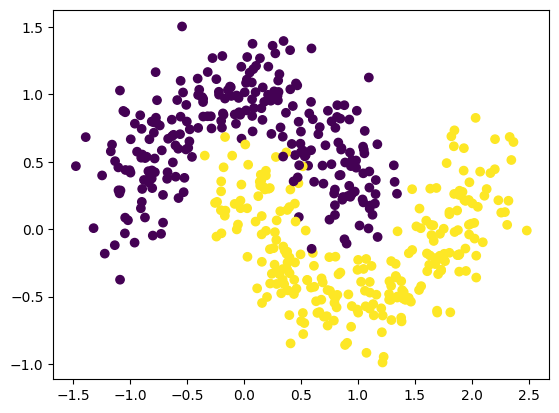

In [2]:
moons_points, moons_labels = make_moons(n_samples=500, noise=0.2, random_state=42)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)

## 1.1 Pure models

First let's try to solve this case with good old Logistic Regression and simple (linear kernel) SVM classifier.

* train LR and SVM classifiers (choose params by hand, no CV or intensive grid search neeeded)
* plot their decision regions
* calculate preffered classification metrics.
* describe results in one-two sentences.

_Tip:_ to plot classifiers decisions you colud use either sklearn examples ([this](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html#sphx-glr-auto-examples-neural-networks-plot-mlp-alpha-py) or any other) and plot with matplotlib yourself or use [mlxtend](https://github.com/rasbt/mlxtend) package (see their examples for details)

_Pro Tip:_ wirte function `plot_decisions` taking a dataset and an estimator and plotting the results cause you want to use it several times below

In [3]:
#from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score

lr = LogisticRegression(solver="saga", tol=1e-3, max_iter=500)  # add some params
svm = SVC(kernel="linear")  # here too

x_train, x_test, y_train, y_test = train_test_split(moons_points, moons_labels, test_size=0.2)

lr.fit(x_train, y_train)
svm.fit(x_train, y_train)

x_min, x_max = np.min(moons_points, axis=0)[0], np.max(moons_points, axis=0)[0] 
y_min, y_max = np.min(moons_points, axis=0)[1], np.max(moons_points, axis=0)[1]
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))



In [4]:
Z_lr= lr.predict(np.c_[xx.ravel(), yy.ravel()])
Z_lr = Z_lr.reshape(xx.shape)

Z_svm= svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_svm = Z_svm.reshape(xx.shape)


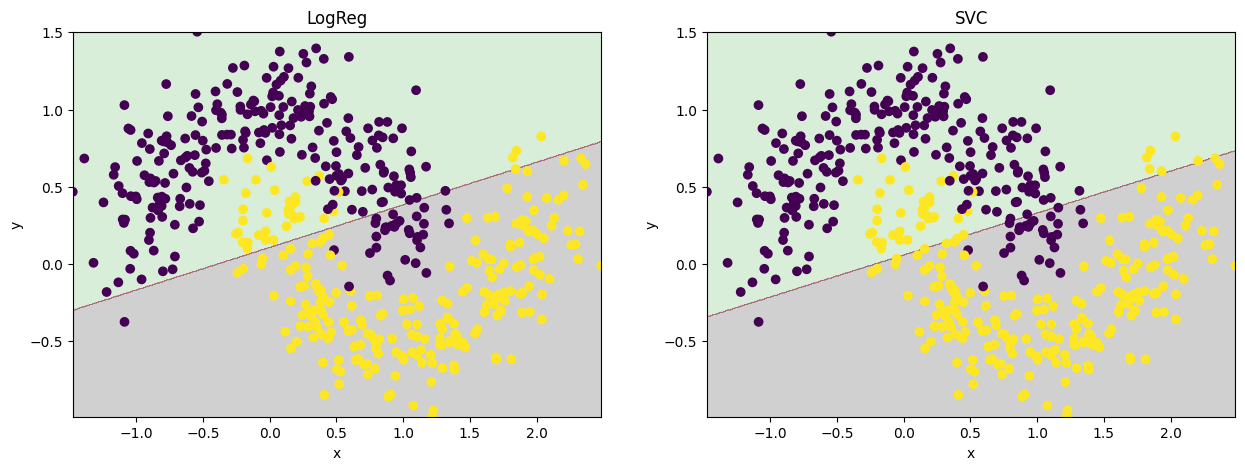

In [5]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_lr, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.title("LogReg")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.title("SVC")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [6]:
y_pred_lr = lr.predict(x_test)
y_pred_svm = svm.predict(x_test)

print("", "lr", "svc", sep="     ")
print("precision", precision_score(y_test, y_pred_lr).round(3), precision_score(y_test, y_pred_svm).round(3), sep=" ")
print("recall", recall_score(y_test, y_pred_lr).round(3), recall_score(y_test, y_pred_svm).round(3), sep=" ")

     lr     svc
precision 0.882 0.88
recall 0.882 0.863


Both models show near results and hyperplanes. Due to the simplicity(they linear) of models they failed in prediction of curve hyperline. 

## 1.2 Kernel tirck

Now use different kernels (`poly`, `rbf`, `sigmoid`) on SVC to get better results. Play `degree` parameter and others.

For each kernel
* estimate optimal params (with a few manual trials)
* plot decision regions
* calculate metrics you've chosen eariler

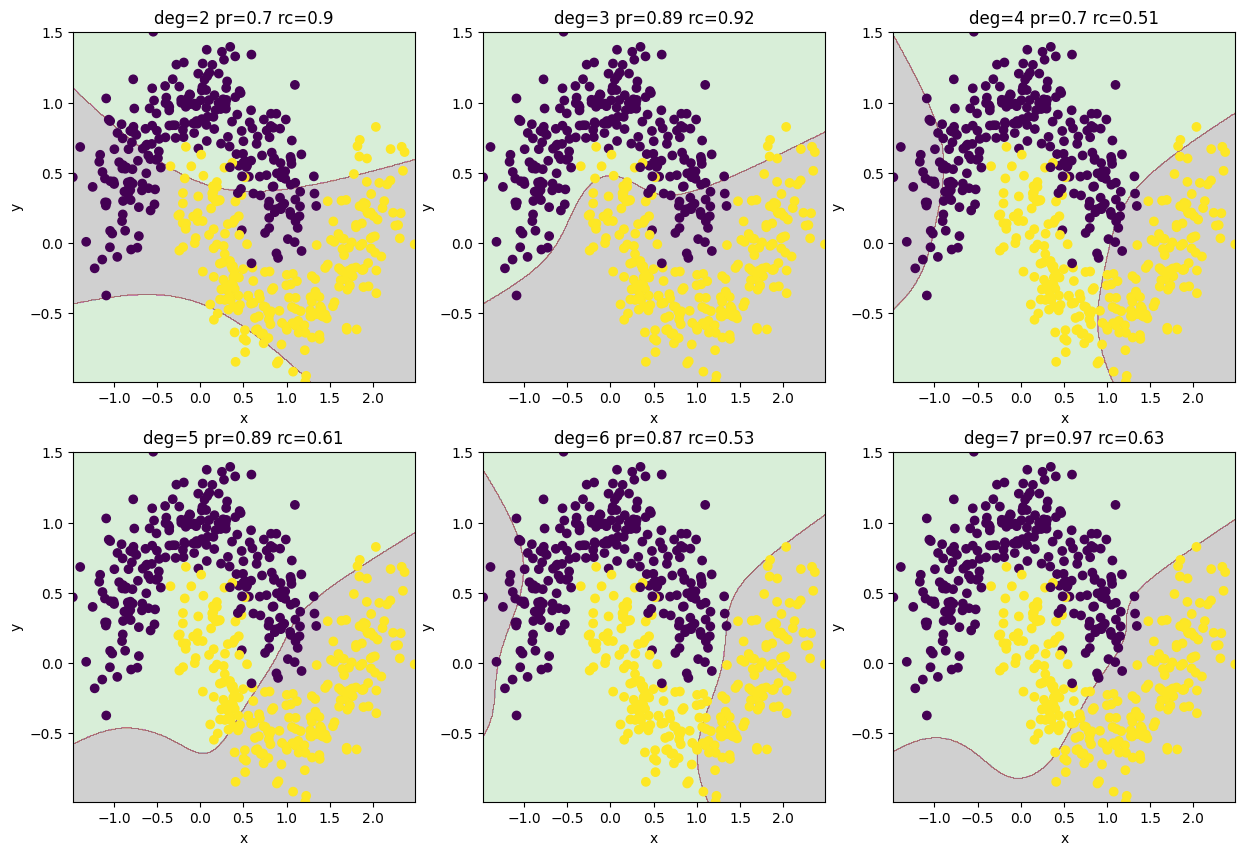

In [7]:
# poly
plt.figure(figsize=(15, 10))

for i in np.arange(2, 8):
    svm = SVC(kernel="poly", degree = i)
    svm.fit(x_train, y_train)
    x_min, x_max = np.min(moons_points, axis=0)[0], np.max(moons_points, axis=0)[0] 
    y_min, y_max = np.min(moons_points, axis=0)[1], np.max(moons_points, axis=0)[1]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))
    Z_svm= svm.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_svm = Z_svm.reshape(xx.shape)
    plt.subplot(2, 3, i-1)
    plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap=plt.cm.Accent)
    plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
    plt.title(f"deg={i} pr={precision_score(y_test, svm.predict(x_test)).round(2)} rc={recall_score(y_test, svm.predict(x_test)).round(2)}")
    plt.xlabel("x")
    plt.ylabel("y")
    


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

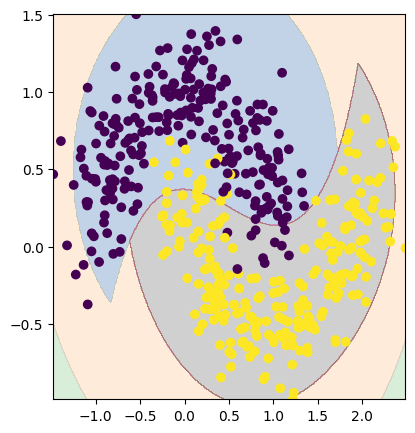

In [17]:
#rbf, sigmoid
plt.figure(figsize=(10, 5))

svc_rbf = SVC(kernel="rbf")
svc_rbf.fit(x_train, y_train)

svc_sgm = SVC(kernel="sigmoid")
svc_sgm.fit(x_train, y_train)

x_min, x_max = np.min(moons_points, axis=0)[0], np.max(moons_points, axis=0)[0] 
y_min, y_max = np.min(moons_points, axis=0)[1], np.max(moons_points, axis=0)[1]
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

Z_rbf= svc_rbf.predict(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

Z_sgm= svc_sgm.predict(np.c_[xx.ravel(), yy.ravel()])
Z_sgm = Z_sgm.reshape(xx.shape)
    
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z_rbf, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.title(f"rbf pr={precision_score(y_test, svc_rbf.predict(x_test)).round(2)} rc={recall_score(y_test, svc_rbf.predict(x_test)).round(2)}")
plt.xlabel("x")
plt.ylabel("y")

plt.subplot(1, 2, 2)
plt.contourf(xx, yy, Z_svm, alpha=0.3, cmap=plt.cm.Accent)
plt.scatter(moons_points[:, 0], moons_points[:, 1], c=moons_labels)
plt.title(f"sgm pr={precision_score(y_test, svc_sgm.predict(x_test)).round(2)} rc={recall_score(y_test, svc_sgm.predict(x_test)).round(2)}")
plt.xlabel("x")
plt.ylabel("y")

Write couple of sentences on:

* What have happenned with classification quality?
* How did decision border changed for each kernel?
* What `degree` have you chosen and why?

1. For SVM(poly, deg=3) and SVM(rbf) qualtity of models significantly increased. SVM(rbf) almost ideally plot a transition line. For other SVM result much worse than linear SVM.
2. For each nonlinear SVM becomes bend, but only some models increase their perfomance.
3. For poly SVM I choose deg=3 because it backs best quality. 

## 1.3 Simpler solution (of a kind)
What is we could use Logisitc Regression to successfully solve this task?

Feature generation is a thing to help here. Different techniques of feature generation are used in real life, couple of them will be covered in additional lectures.

In particular case simple [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) are able to save the day.

Generate the set of new features, train LR on it, plot decision regions, calculate metric.

* Comare SVM's results with this solution (quality, borders type)
* What degree of PolynomialFeatures have you used? Compare with same SVM kernel parameter.

In [9]:
from sklearn.preprocessing import PolynomialFeatures

def lr_with_poly(deg, subplot_index):
    
    poly = PolynomialFeatures(deg)
    x_train_poly = poly.fit_transform(x_train)
    x_test_poly = poly.transform(x_test)
    lr = LogisticRegression(solver="saga", tol=1e-3, max_iter=1000)
    lr.fit(x_train_poly, y_train)

    x_min, x_max = np.min(moons_points, axis=0)[0], np.max(moons_points, axis=0)[0] 
    y_min, y_max = np.min(moons_points, axis=0)[1], np.max(moons_points, axis=0)[1]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    Z = lr.predict(poly.transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.subplot(subplot_index[0], subplot_index[1], subplot_index[2])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Accent)
    y_train_c = []
    for i in y_train:
        if i == 0:
            y_train_c.append("Red")
        else:
            y_train_c.append("White")
    plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train_c)
    plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)
    plt.title(f"deg={deg} pr={precision_score(y_test, lr.predict(x_test_poly)).round(2)} rc={recall_score(y_test, lr.predict(x_test_poly)).round(2)}")
    plt.xlabel("x")
    plt.ylabel("y")



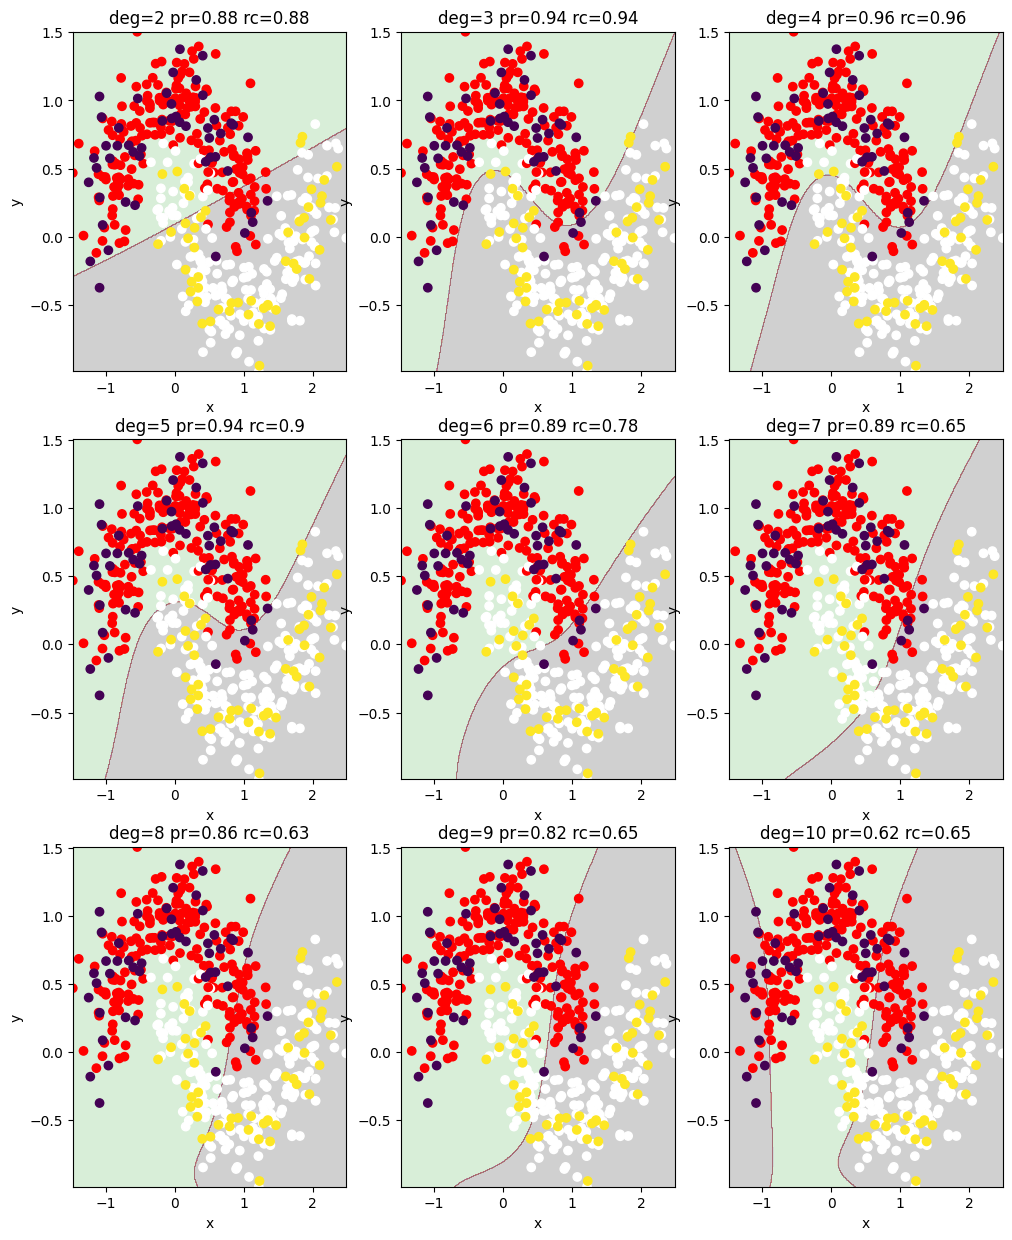

In [10]:
plt.figure(figsize=(12, 15))
plt.tight_layout()

for i in np.arange(2, 11):
    lr_with_poly(i, [3, 3, i-1])

1. LR with deg=3 is very similar to SVM(poly, deg=3) as with boundary as with quality.
2. From deg=5 LR starts to fast decrease in quality.

## 1.4 Harder problem

Let's make this task a bit more challenging via upgrading dataset:

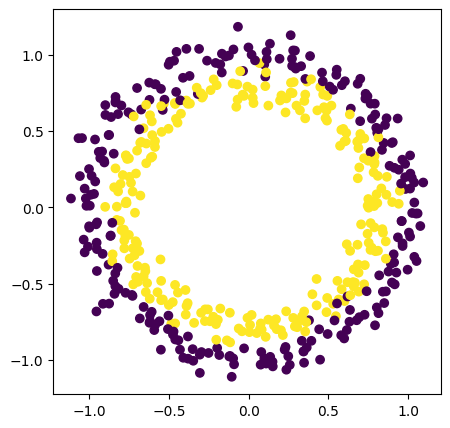

In [11]:
from sklearn.datasets import make_circles


circles_points, circles_labels = make_circles(n_samples=500, noise=0.06, random_state=42)

plt.figure(figsize=(5, 5))
plt.scatter(circles_points[:, 0], circles_points[:, 1], c=circles_labels)

And even more:

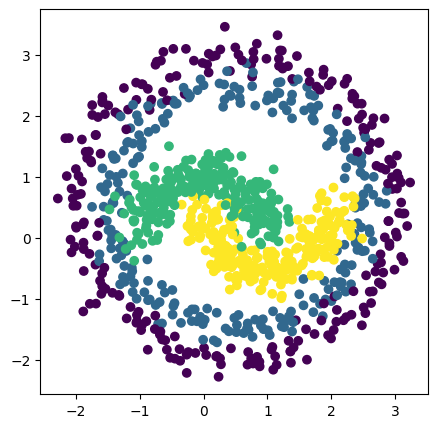

In [12]:
points = np.vstack((circles_points * 2.5 + 0.5, moons_points))
labels = np.hstack((circles_labels, moons_labels + 2))  # + 2 to distinct moons classes

plt.figure(figsize=(5, 5))
plt.scatter(points[:, 0], points[:, 1], c=labels)

On that harder problem compare SVM and Gradient boosting.

Tune GB (manually ok), then SVM with appropriate kernel of your choice.

Again plot decision regions, calculate metrics.

Justify the results in a few phrases.

In [13]:
x_train, x_test, y_train, y_test = train_test_split(points, labels, test_size=0.2)

In [14]:
import time

def plot_region(model, subplot_index, name):
    start_time = time.time()   
    model.fit(x_train, y_train)
    end_time = time.time()
    
    x_min, x_max = np.min(points, axis=0)[0], np.max(points, axis=0)[0] 
    y_min, y_max = np.min(points, axis=0)[1], np.max(points, axis=0)[1]
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(subplot_index[0], subplot_index[1], subplot_index[2])
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Accent)
    plt.scatter(points[:, 0], points[:, 1], c=labels)
    plt.title(f"{name} pr={precision_score(y_test, model.predict(x_test), average="macro").round(2)} rc={recall_score(y_test, model.predict(x_test), average="macro").round(2)}")
    plt.xlabel("x")
    plt.ylabel("y")
    print(start_time - end_time)
    return(start_time - end_time)

-0.0063934326171875
-0.013975143432617188
rbf time = -0.0063934326171875 poly time = -0.013975143432617188


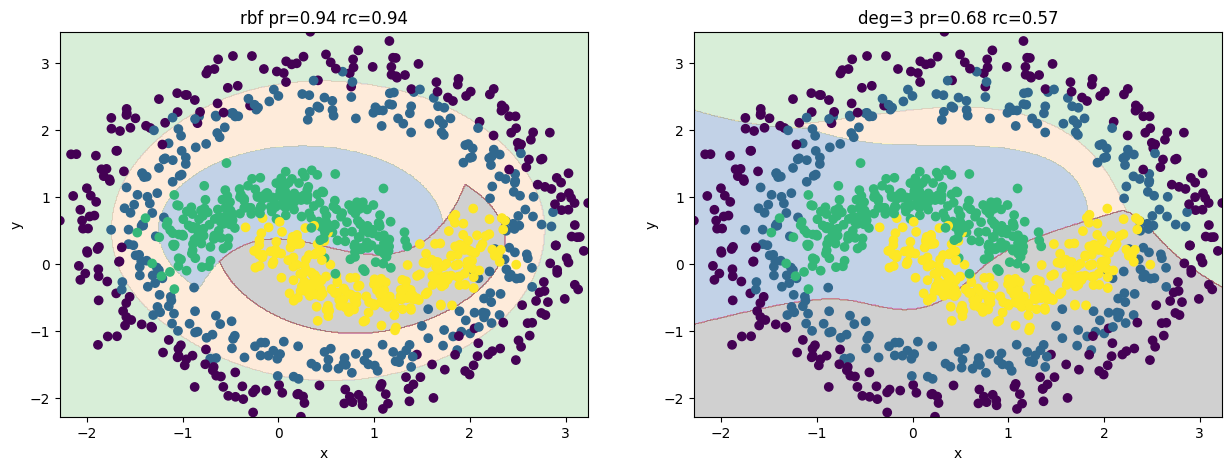

In [15]:
plt.figure(figsize=(15,5))

svc = SVC(kernel="rbf")
t1 = plot_region(svc, [1, 2, 1], "rbf")

svc_poly = SVC(kernel="poly", degree=3)
t2 = plot_region(svc_poly, [1, 2, 2], "deg=3")

print(f"rbf time = {t1} poly time = {t2}")

-1.1003038883209229


-1.1003038883209229

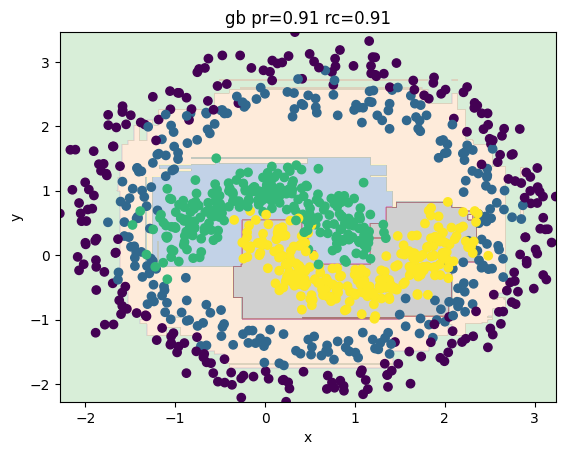

In [16]:
from sklearn.ensemble import GradientBoostingClassifier

boost = GradientBoostingClassifier(max_depth=3, n_estimators=300, learning_rate=0.02)
plot_region(boost, [1, 1, 1], "gb")

1. SVM with rbf succeed in predicition very well. SVM with poly can't fit a good boundary.
2. GB also work very well, but his quality is less worse, that is probably because he can create only flat boundaries. Instead, GB's time of learning is better.